<h1><b>Tiền xử lí dữ liệu (phần 2)

Trong bài này, ta sẽ tiếp tục thực hành những vấn đề:

    - Data transformation:
        + Kỹ thuật Ordinal Encoding và One-hot encoding
        + Kỹ thuật binning: Uniform, Quantile, Clustered
    - Data augmentation: tăng cường dữ liệu để đề phòng trường hợp dữ liệu mất cân đối hoặc các mẫu / phân lớp quá hiếm gặp

<h1>Data Transformation

<h3>Kĩ thuật Ordinal Encoding

Đầu tiên ta cần import thư viện cần thiết `pandas` với tên tắt là `pd`

In [3]:
### BEGIN SOLUTION
import pandas as pd
### END SOLUTION

Tiếp đến là đọc file csv bằng `pandas` như những bài trước và lưu dataframe vào biến `df`. Khi nộp trên hệ thống, các bạn vui lòng đọc tại đường dẫn `data/heart.csv`.

In [4]:
### BEGIN SOLUTION
df = pd.read_csv("data/heart.csv")
### END SOLUTION
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


Ta thấy ở cột `ChestPain`, cột `Thal`, cột `AHD` có dữ liệu dạng **category**.
Giả sử mô hình của ta chỉ nhận dữ liệu đầu vào dạng số, ta phải biến các cột này thành dạng số sao cho những đặc trưng này không bị thay đổi

Ở cột `ChestPain`:
*   typical: 1
*   asymptomatic: 2
*   nonanginal: 3
*   nontypical: 4

Ở cột `Thal`:
*   normal: 1
*   fixed: 2
*   reversable: 3

Ở cột `AHD`:
*   No: 0
*   Yes: 1

In [5]:
### BEGIN SOLUTION
chest_pain_mapping = {
    'typical': 1,
    'asymptomatic': 2,
    'nonanginal': 3,
    'nontypical': 4
}

thal_mapping = {
    'normal': 1,
    'fixed': 2,
    'reversable': 3
}

ahd_mapping = {
    'No': 0,
    'Yes': 1
}

df['ChestPain'] = df['ChestPain'].map(chest_pain_mapping)
df['Thal'] = df['Thal'].map(thal_mapping)
df['AHD'] = df['AHD'].map(ahd_mapping)
### END SOLUTION

df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,2,0
1,2,67,1,2,160,286,0,2,108,1,1.5,2,3,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2,3,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,1,0
4,5,41,0,4,130,204,0,2,172,0,1.4,1,0,1,0


In [6]:
assert df['ChestPain'].dtypes == 'int64'
assert df.shape == (50, 15)

<h3>Kĩ thuật One-hot encoding

Ở đây ta sẽ tiếp tục đi đến một kĩ thuật khác đó là `One-hot`

Ta tiếp tục đọc file csv bằng `pandas` và lưu dataframe vào biến `df`. Khi nộp trên hệ thống, các bạn vui lòng đọc tại đường dẫn `data/heart.csv`.

In [9]:
### BEGIN SOLUTION
import pandas as pd
df = pd.read_csv("data/heart.csv")
### END SOLUTION
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


Ở cột `Thal`, ta sẽ biến cột này thành `One-hot` bằng cách thêm 3 cột `fixed`, `normal`, `reversable` vào `df`

**Ba cột mới này sẽ biểu diễn One-hot cho cột `Thal` cũ**

In [10]:
### BEGIN SOLUTION
df = pd.get_dummies(df, columns=['Thal'], prefix='', prefix_sep='')
df.rename(columns={'fixed': 'fixed', 'normal': 'normal', 'reversable': 'reversable'}, inplace=True)
### END SOLUTION

df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,fixed,normal,reversable
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0,No,True,False,False
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,Yes,False,True,False
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,Yes,False,False,True
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,No,False,True,False
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,No,False,True,False
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0,No,False,True,False
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,Yes,False,True,False
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0,No,False,True,False
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1,Yes,False,False,True
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0,Yes,False,False,True


In [11]:
assert df.shape == (50, 17)
assert df['fixed'][0] == 1
assert df['normal'][0] == 0
assert df['reversable'][0] == 0

<i>Trong một số trường hợp, ta không thể giữ nguyên dữ liệu dạng số để tính toán, mà ta cần chuyển nó qua dạng category

Thường thì các mô hình Tree sẽ cần dữ liệu dạng Category </i>

Để làm được việc này, ta sẽ đi đến kĩ thuật đầu tiên `Uniform`

<h3>Kĩ thuật Uniform

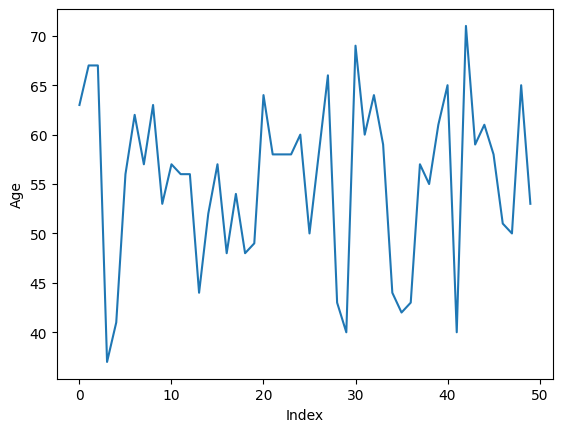

In [12]:
import matplotlib.pyplot as plt 

plt.plot(df['Age'])
plt.xlabel('Index')
plt.ylabel('Age');

**Kĩ thuật Uniform dùng để biến dữ liệu thành các Bin có khoảng dữ liệu bằng nhau**

Mục tiêu: Tạo thêm **1 cột**, giá trị của cột là `middle-age` hoặc `old` hoặc `elderly`, cột có label là `Uniform`, cột này ở kế sau cột `Age`

Ta có thể làm thủ công hoặc sử dụng phương thức `qcut` của `pandas`

In [13]:
### BEGIN SOLUTION
import pandas as pd

df['Uniform'] = pd.qcut(df['Age'], q=3, labels=['middle-age', 'old', 'elderly'])

age_index = df.columns.get_loc('Age')
df.insert(age_index + 1, 'Uniform', df.pop('Uniform'))
### END SOLUTION

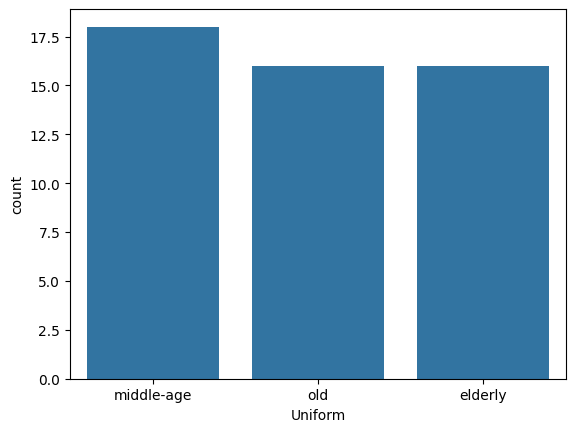

In [14]:
import seaborn as sns
sns.countplot(x=df['Uniform']);

Ta có thể thấy số lượng dữ liệu chênh nhau không quá nhiều

In [15]:
assert df.columns[2] == 'Uniform'
assert df['Uniform'].dtype == 'category'

<h3>Kĩ thuật Quantile

Kĩ thuật Quantile dùng để chia dữ liệu thành những khoảng với phần trăm cho trước

Giả sử ta sẽ chia cột `Age` thành 4 phần:
* `Q1` <= 25%
* 25% < `Q2` <= 50%
* 50% < `Q3` <= 95%
* 95% < `Q4`

Sau đó ta thêm cột `Quantile` với các giá trị `Q1, Q2, Q3, Q4` ở vị trí thứ 3 của dataframe `df`

In [26]:
labels = ['Q1', 'Q2', 'Q3', 'Q4']
quantiles = df['Age'].quantile([0.25, 0.5, 0.95])
### BEGIN SOLUTION
bins = [-float('inf'), quantiles[0.25], quantiles[0.5], quantiles[0.95], float('inf')]

df['Quantile'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

df['Quantile'] = pd.Categorical(df['Quantile'], categories=['Q3', 'Q1', 'Q2', 'Q4'], ordered=True)

df.insert(2, 'Quantile', df.pop('Quantile'))

### END SOLUTION

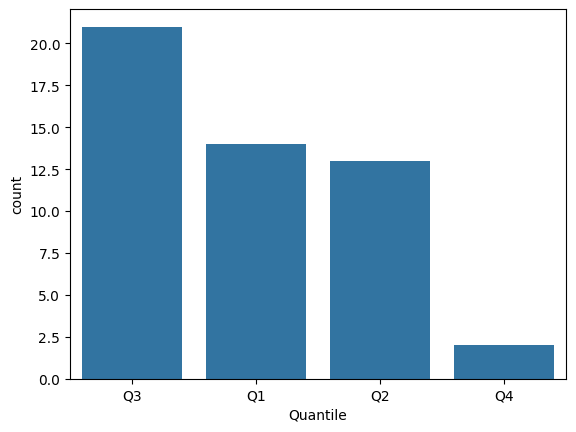

In [27]:
sns.countplot(x=df['Quantile']);

In [18]:
assert df.shape == (50, 19)

<h3>Kĩ thuật Clustered

Kĩ thuật Clustered dùng để biến dữ liệu theo ý của ta

Ở đây là các tuổi lớn hơn **60** là `C1` và còn lại là `C2`

Ta tiếp tục thêm cột `Clustered` ở vị trí thứ `4`, giá trị của cột này là `C1, C2`

In [19]:
labels = ['C1', 'C2']
### BEGIN SOLUTION
import pandas as pd

df['Clustered'] = df['Age'].apply(lambda x: 'C1' if x > 60 else 'C2')

df.insert(4, 'Clustered', df.pop('Clustered'))
### END SOLUTION

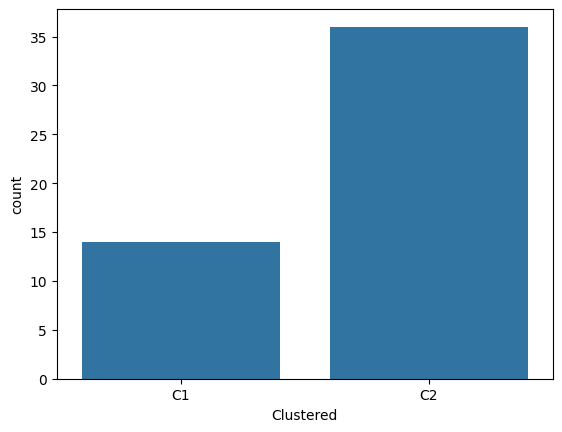

In [20]:
sns.countplot(x=df['Clustered']);

<h1>Data augmentation

Đối với những bài toán mà quá ít dữ liệu, ta có thể tìm thêm hoặc tạo ra dữ liệu mới từ những dữ liệu hiện có

Nhưng điều này ít nhiều cũng sẽ ảnh hưởng đến chất lượng của mô hình, ta nên cân nhắc kĩ khi sử dụng cách này